# Module 03: EDA

In [97]:
# packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split 
from ISLP import load_data

# set seed
seed = 2323

### We'll use the _Hitters_ data from ISLP for this activity. The metadata for _Hitters_ can be found [here](https://intro-stat-learning.github.io/ISLP/datasets/Hitters.html).

In [98]:
# Load the data
Hitters = load_data('Hitters')

### Determine the number of rows and columns in the dataset by returning its "shape" attribute

In [99]:
Hitters.shape

(322, 20)

### Determine whether each feature is numeric or categorical by returning the "dtype" attribute for each column

In [100]:
for col in Hitters.columns:
    print(f"{col}: {Hitters[col].dtype}")

AtBat: int64
Hits: int64
HmRun: int64
Runs: int64
RBI: int64
Walks: int64
Years: int64
CAtBat: int64
CHits: int64
CHmRun: int64
CRuns: int64
CRBI: int64
CWalks: int64
League: category
Division: category
PutOuts: int64
Assists: int64
Errors: int64
Salary: float64
NewLeague: category


### Before doing any other analyses, let's create training and test sets.

In [101]:
Train, Test = train_test_split(Hitters, 
                               random_state=seed, 
                               test_size=0.40, 
                               shuffle=True) 

### Based on the metadata, what is the difference between the 6 columns starting with 'C' and the 6 related columns that don't?

The 'C' indicates that the values in that column are for a player's entire career, while the related non-'C' columns are for the 1986 season. 

### On the training set, create pairwise scatterplots for each of these 6 columns with the 'Salary' variable.

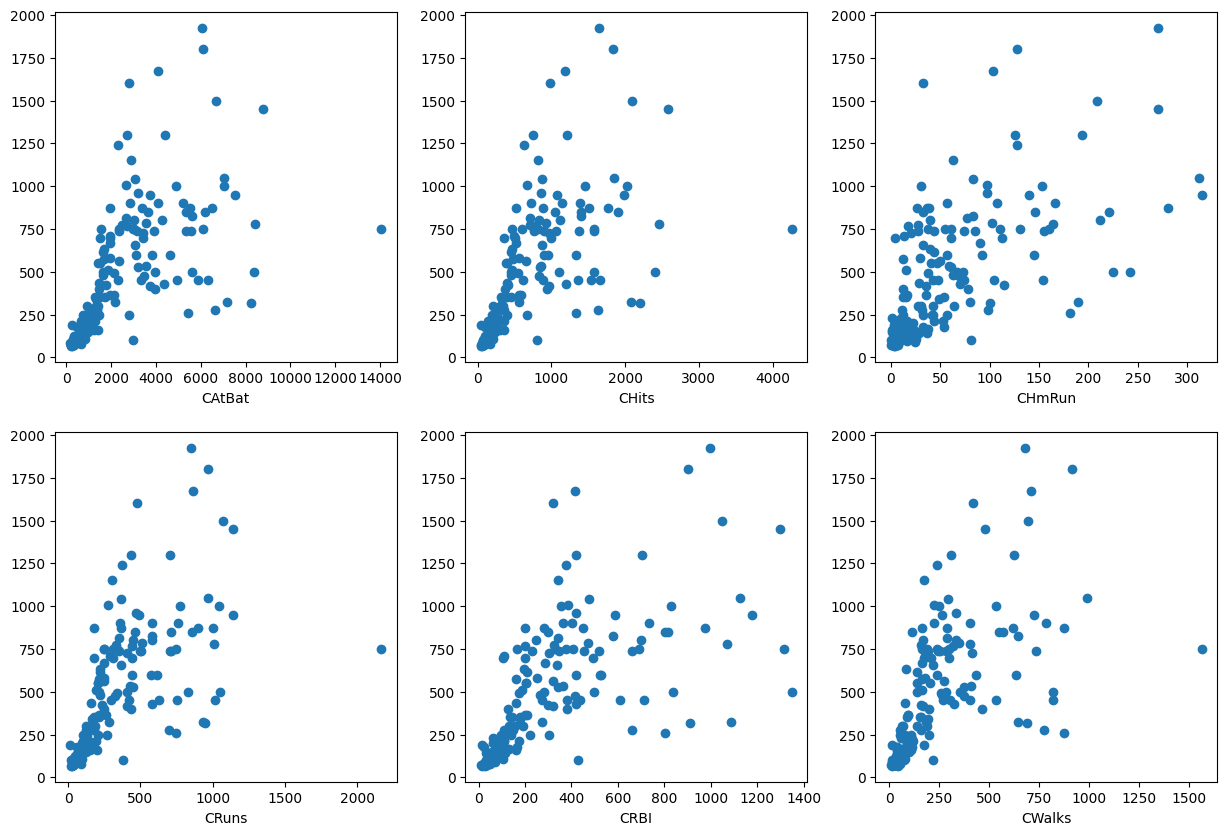

In [102]:
# First create a subset of the columns that we want to plot
subset = Train[['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']]

# Initialize the plots before drawing them
fig, axes = subplots(nrows=2,
                     ncols=3,
                     figsize=(15, 10))

# Copy the helper function
def range_to_grid(i,Ncol):
    x=[]
    y=[]
    for n in range(Ncol**2):
        x.append(int(np.floor(n/Ncol)))
        y.append(n % Ncol)
        #print(n,x[n],y[n])
    return x[i],y[i]

# Plot the variables
for j in range(len(subset.columns)):
    axes[range_to_grid(j,3)[0],range_to_grid(j,3)[1]].plot(subset.iloc[:,j], Train['Salary'], 'o')
    axes[range_to_grid(j,3)[0],range_to_grid(j,3)[1]].set_xlabel(subset.columns[j])

### Use the "describe" method to determine the mean, standard deviation, and 5 number summary of all numeric variables in the training subset of _Hitters_.

In [103]:
Hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


### It looks like the mean and median of 'AtBat' are nearly equal. This _might_ suggest that this variable is normally distributed. Create a histogram of 'AtBat' to check this hypothesis.

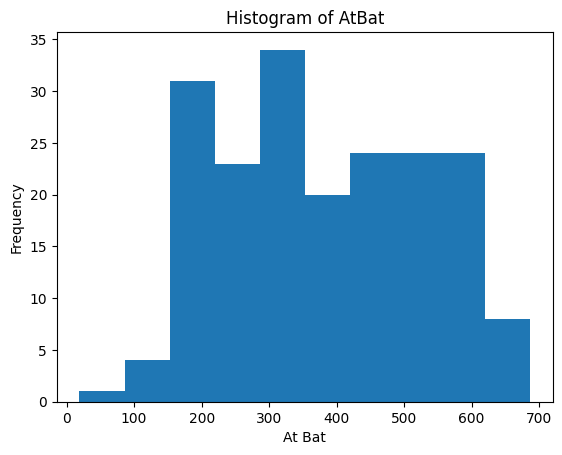

In [104]:
plt.hist(Train['AtBat'])
plt.xlabel('At Bat')
plt.ylabel('Frequency')
plt.title('Histogram of AtBat')
plt.show()

### Let's standardize the AtBat feature (i.e., normalize by z-scores). We'll create a new column in the training data called 'AtBat_st' to represent this.

In [105]:
Train['AtBat_st'] = (Train['AtBat'] - Train['AtBat'].mean()) / Train['AtBat'].std()

### How many rows have an 'AtBat' value within the first standard deviation?

Hint: the 'len' magic method returns the number of rows of a dataFrame.

In [106]:
value_within_1sd = Train[(Train['AtBat_st'] >= -1) & (Train['AtBat_st'] <= 1)]
len(value_within_1sd)

115

### Going back to the results of the 'describe' method, how can you tell that the 'Salary' variable has missing values?

The count is listed at 263 for the Salary variable however the total columns is 322 (as shown by Hitters.shape and reflected by all other variable count values in the results).

### Describe a situation where a variable could have missing values but this would not be reflected in the results of the 'describe' method.

If a placeholder value is used for the missing value (e.g. -1, 'n/a'), describe() won't recognize this placeholder as a missing value and will use these values it its computations.

### On the training data, create separate boxplots of the 'AtBat' variable for when 'Salary' is populated or missing.

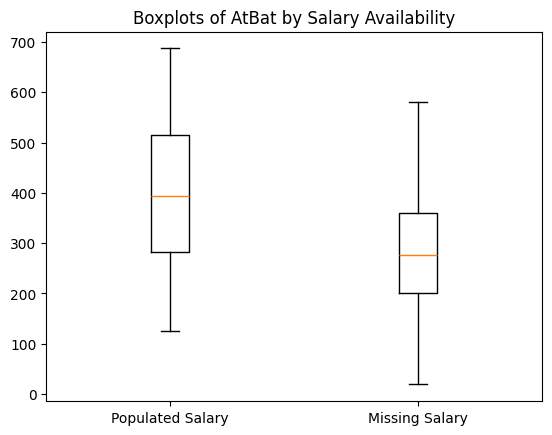

In [107]:
fig, axes = plt.subplots()
axes.boxplot([Train[Train['Salary'].notna()]['AtBat'],
            Train[Train['Salary'].isna()]['AtBat']])
axes.set_xticklabels(['Populated Salary', 'Missing Salary'])
axes.set_title('Boxplots of AtBat by Salary Availability')
plt.show()

### Create a correlation matrix for all numeric features in the training set

In [108]:
corr_matrix = Train.select_dtypes(include='number').corr()
corr_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,AtBat_st
AtBat,1.000000,0.963324,0.540323,0.906579,0.798717,0.631824,-0.039232,0.126602,0.146763,0.150166,0.164892,0.145779,0.056578,0.345879,0.363085,0.368162,0.401390,1.000000
Hits,0.963324,1.000000,0.516853,0.914739,0.795316,0.605876,-0.028717,0.133316,0.163329,0.136865,0.175542,0.153011,0.065178,0.312858,0.310422,0.301725,0.432558,0.963324
HmRun,0.540323,0.516853,1.000000,0.618439,0.840613,0.385425,0.009072,0.078981,0.076914,0.411917,0.110767,0.218285,0.080296,0.222084,-0.069088,0.062840,0.326021,0.540323
Runs,0.906579,0.914739,0.618439,1.000000,0.786635,0.711346,-0.069584,0.083770,0.103859,0.160979,0.159683,0.115628,0.099025,0.289952,0.184714,0.217297,0.441499,0.906579
RBI,0.798717,0.795316,0.840613,0.786635,1.000000,0.553527,0.046705,0.165837,0.180526,0.375072,0.191452,0.285074,0.117109,0.323825,0.138896,0.217983,0.414623,0.798717
Walks,0.631824,0.605876,0.385425,0.711346,0.553527,1.000000,0.037943,0.137157,0.147019,0.194766,0.205250,0.167453,0.312812,0.317000,0.139008,0.160753,0.458462,0.631824
Years,-0.039232,-0.028717,0.009072,-0.069584,0.046705,0.037943,1.000000,0.925308,0.906857,0.730478,0.882559,0.882835,0.836809,0.071301,-0.091915,-0.160476,0.541390,-0.039232
CAtBat,0.126602,0.133316,0.078981,0.083770,0.165837,0.137157,0.925308,1.000000,0.995185,0.775167,0.979705,0.948617,0.894573,0.120875,-0.000507,-0.068187,0.616677,0.126602
CHits,0.146763,0.163329,0.076914,0.103859,0.180526,0.147019,0.906857,0.995185,1.000000,0.761920,0.983128,0.945002,0.883547,0.132818,-0.003372,-0.062669,0.629875,0.146763
CHmRun,0.150166,0.136865,0.411917,0.160979,0.375072,0.194766,0.730478,0.775167,0.761920,1.000000,0.782490,0.912134,0.750795,0.126756,-0.129640,-0.141514,0.616170,0.150166


### Propose two different ways of imputing the missing values of Salary while taking advantage of the information given in the boxplots or the correlation matrix.

1) Use the information from the boxplot to group players by related variables and replace missing values with the median Salary from the associated group.
2) Use the correlation matrix to determine which features are strongly correlated with Salary (e.g. CAtBat, CHits) and use them to fit a regression model to predict missing Salary values.

### For our last exercise, we'll explore Hits and Walks relative to AtBat totals. 
- Use the sum function to calculuate the totals of each of these three variables for the 1986 season (on the training set). 
- Create a pie chart which shows total hits, total walks, and remaining total (neither) as percents of the At Bats total (on the training set). 

In [109]:
TotHits = Train['Hits'].sum()
TotWalks = Train['Walks'].sum()
TotAtBat = Train['AtBat'].sum()

Labels = ['Hits', 'Walks', 'Neither']
Totals = [TotHits, TotWalks, TotAtBat-TotHits-TotWalks]

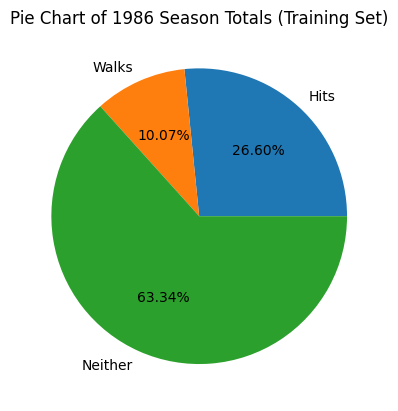

In [110]:
plt.pie(Totals, labels=Labels, autopct='%1.2f%%')
plt.title('Pie Chart of 1986 Season Totals (Training Set)')
plt.show()


### The previous two cells gave us totals across all players. For each player in the training set, calculate the Hits as a percent of AtBat and store it in a new variable called 'AVG'

In [111]:
Train['AVG'] = Train['Hits'] / Train['AtBat']

### Using 0.25 and 0.31 as the split points, create a new variable with three bins: high, medium, and low. 

In [112]:
Train['AVG_bin'] = 'medium'
Train.loc[Train['AVG'] < 0.25, 'AVG_bin'] = 'low'
Train.loc[Train['AVG'] > 0.31, 'AVG_bin'] = 'high'

### Create a bar chart that displays the number of players in each of the low, medium, and high categories (for the training data).

In [113]:
Train['AVG_bin'].value_counts()

AVG_bin
medium    114
low        65
high       14
Name: count, dtype: int64

Notice that the order of the bars will be medium, low, high. That's counterintuitive. We can reorder these quickly. 

In [114]:
indexMap = ['low', 'medium', 'high']
reordered_list = [Train['AVG_bin'].value_counts()[i] for i in indexMap]

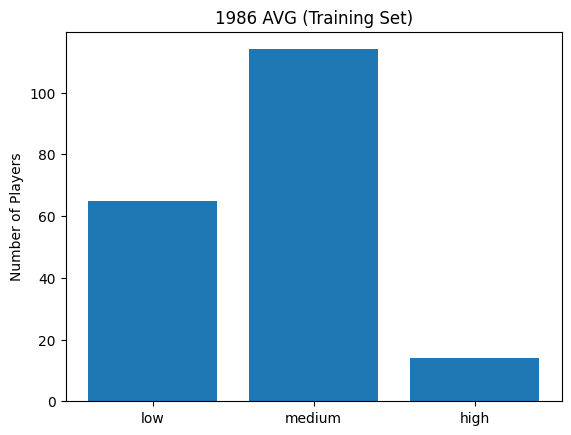

In [115]:
plt.bar(indexMap, reordered_list)

plt.title("1986 AVG (Training Set)")
plt.ylabel("Number of Players")

plt.xticks(indexMap)

plt.show()

### Did we use the depth method or width method for creating these bins? Explain.

We used the width method for creating these bins. The observations were seperated into defined intervals (less than 0.25, between 0.25 and 0.31, and greater than 0.31) whereas with the depth method they would be seperated into bins with equal amounts of observations.